In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [133]:
# -2.5log_10(intensity) / intensity of reference star in the same spectral band

In [134]:
df = pd.read_csv("star_data_3.csv")
df

,Unnamed: 0,Star Name,Distance (pc),Spectral Class,Index,Luminosity Class
0,0,Absolutno,273.845058,G8V,0,V
1,1,Acamar,49.431537,A2V,1,V
2,2,Achernar,42.753313,B6Vpe,2,V
3,3,Achird,5.923041,F9V,3,V
4,4,Acrux,98.716683,B0.5IV+B1V,4,IV
...,...,...,...,...,...,...
426,426,Zibal,36.503011,kA4hA9mA9V,426,V
427,427,Zosma,17.914726,A5IV(n),427,IV
428,428,Zubenelgenubi,23.239600,kA2hA5mA4IV-V,428,IV
429,429,Zubenelhakrabi,50.025013,G8.5III,429,III


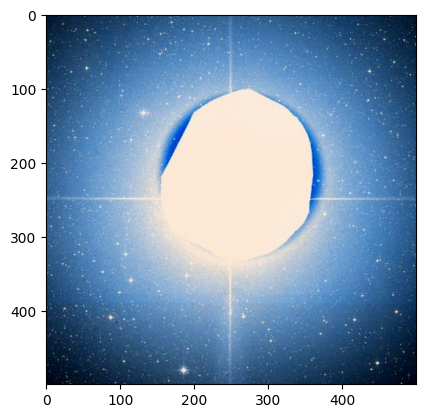

In [135]:
im = cv2.imread("./Star Images 2/A/Sirius.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [136]:
pixel_sum_value = np.sum(im)
avg_img_value = pixel_sum_value / (im.shape[0] * im.shape[1])
pixel_sum_value, avg_img_value

(104406973, 417.627892)

In [137]:
# im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# im_blur = cv2.GaussianBlur(im_gray, (3, 3), 0)
# sobelx = cv2.Sobel(src=im_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
# sobely = cv2.Sobel(src=im_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
# sobelxy = cv2.Sobel(src=im_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# # Display Sobel Edge Detection Images
# plt.imshow(sobelxy, cmap='gray')

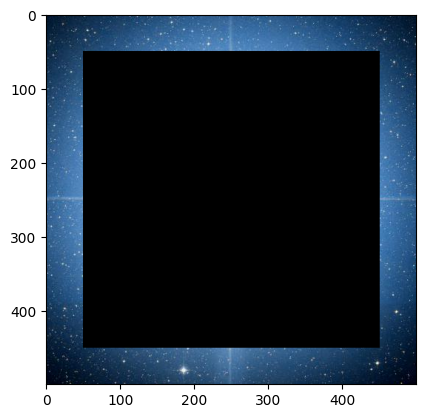

In [138]:
bw = 50
mask = np.ones(im.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (bw,bw),(im.shape[1]-bw,im.shape[0]-bw), 0, -1)
output = cv2.bitwise_and(im, im, mask = mask)
plt.imshow(output)
plt.show()

In [139]:
pixel_sum_value_2 = np.sum(output)
avg_bg_value = pixel_sum_value_2 / 90000
avg_bg_value

241.8013

In [140]:
luminosity = pixel_sum_value - avg_bg_value * 500 * 500

luminosity

43956648.0

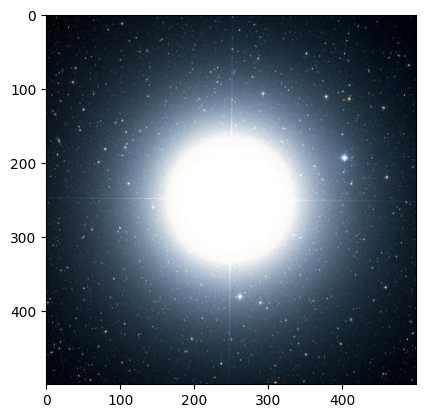

In [141]:
im2 = cv2.imread("./Star Images 2/A/Vega.jpg")
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.imshow(im2)
plt.show()

In [142]:
pixel_sum_value = np.sum(im)
avg_img_value = pixel_sum_value / (im.shape[0] * im.shape[1])
pixel_sum_value, avg_img_value

(104406973, 417.627892)

In [143]:
def calc_luminosity(img_path):
    im = cv2.imread(img_path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    pixel_sum_value = np.sum(im)
    avg_img_value = pixel_sum_value / (im.shape[0] * im.shape[1])
    bw = 50
    mask = np.ones(im.shape[:2], dtype = "uint8")
    cv2.rectangle(mask, (bw,bw),(im.shape[1]-bw,im.shape[0]-bw), 0, -1)
    output = cv2.bitwise_and(im, im, mask = mask)
    pixel_sum_value_2 = np.sum(output)
    avg_bg_value = pixel_sum_value_2 / 90000
    luminosity = pixel_sum_value - avg_bg_value * 500 * 500
    return luminosity

In [144]:
calc_luminosity("./Star Images 2/A/Sirius.jpg") / calc_luminosity("./Star Images 2/A/Vega.jpg")

0.9617742946919263

In [151]:
apparent_magnitude = -2.5 * np.log10(calc_luminosity("./Star Images 2/A/Vega.jpg") / calc_luminosity("./Star Images 2/A/Vega.jpg"))
apparent_magnitude

-0.0